In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
import json

In [2]:
import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS.keys())

In [3]:
with open('params.json') as f:
    params = json.load(f)

with open('areas.json') as f:
    areas = json.load(f)

In [4]:
def compare_params_area(area_type = "hls"):

    type_label = {"hls" : "HLS",
                  "syn" : "Synthesized",
                  "pnr" : "PnR"
                 }

    fig, ax = plt.subplots()

    n_models = len(areas.keys())

    ax.set_xlabel("Number of trainable parameters")
    ax.set_ylabel(type_label[area_type] + " area")

    x_array = list([params[model] for model in areas.keys()])
    y_array = list([areas[model][area_type] for model in areas.keys()])

    dots = []
    for i in range(0,n_models):
        dots += [ax.scatter(x_array[i], y_array[i], marker='o', color = colors[i])]

    #lines = []
    labels = list(areas.keys())
    
    ax.legend(dots,labels=labels, bbox_to_anchor=(1.4, 1))
    plt.show()

In [16]:
def compare_area_types():

    fig, ax = plt.subplots()

    n_models = len(areas.keys())
    print(n_models)

    ax.set_xlabel("Number of trainable parameters")
    ax.set_ylabel("Area")

    x_array = list([params[model] for model in areas.keys()])

    dots = []
    for t in ["hls", "syn", "pnr"]:

        x_array = list([params[model] for model in areas.keys() if areas[model][t] > 0])
        y_array = list([areas[model][t] for model in areas.keys() if areas[model][t] > 0])

        order = np.argsort(x_array)

        sorted_x_array = [x_array[i] for i in order]
        sorted_y_array = [y_array[i] for i in order]
        
        dots += [ax.plot(sorted_x_array, sorted_y_array, marker='o', linestyle = '-')]

    #lines = []
    labels = list(["hls", "syn", "pnr"])
    
    ax.legend(dots,labels=labels)
    plt.show()

6


/tmp/ipykernel_11666/1525084300.py:29: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(dots,labels=labels)


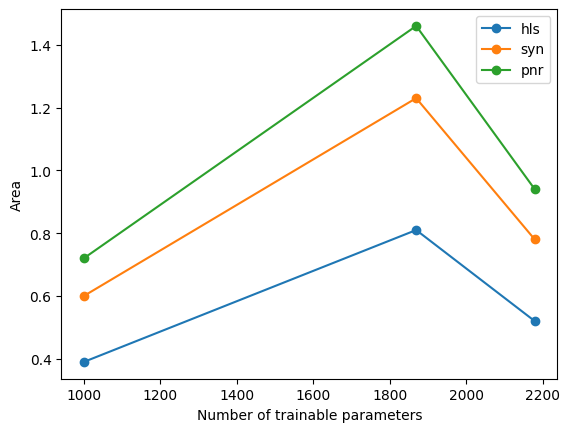

In [17]:
compare_area_types()

/tmp/ipykernel_11666/1357530424.py:25: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(dots,labels=labels, bbox_to_anchor=(1.4, 1))


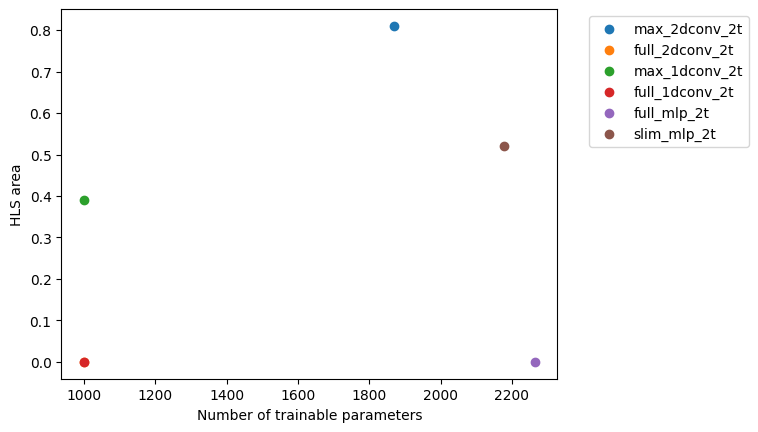

In [7]:
compare_params_area("hls")

/tmp/ipykernel_11666/1357530424.py:25: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(dots,labels=labels, bbox_to_anchor=(1.4, 1))


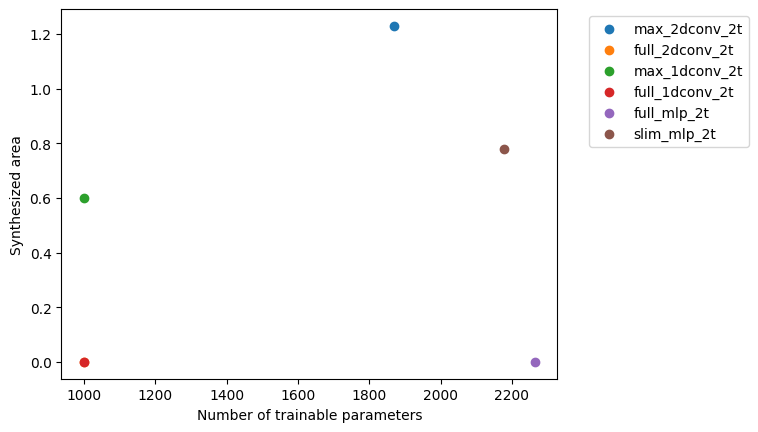

In [8]:
compare_params_area("syn")

/tmp/ipykernel_11666/1357530424.py:25: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(dots,labels=labels, bbox_to_anchor=(1.4, 1))


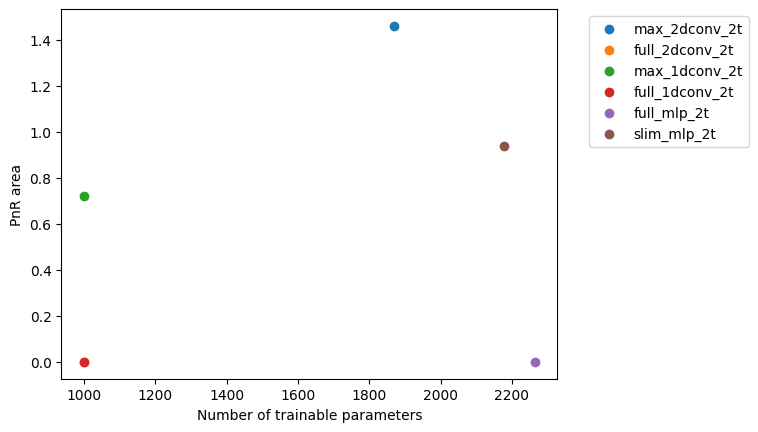

In [9]:
compare_params_area("pnr")